# 911 Calls Capstone Project

For this project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert).

## Data and Setup

Import numpy and pandas

In [1]:
import numpy as np
import pandas as pd

Import visualization libraries and set %matplotlib inline.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Read in the csv file as a dataframe called df

In [3]:
df = pd.read_csv("911.csv")

Check the info() of the df

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [19]:
df.shape

(99492, 9)

Check the head of df

In [6]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Basic Questions

**1) What are the top 5 zipcodes for 911 calls?**

In [7]:
df.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e'], dtype='object')

In [16]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

**2) What are the top 5 townships (twp) for 911 calls?**

In [17]:
df['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

**Take a look at the 'title' column, how many unique title codes are there?**

In [18]:
df['title'].nunique()

110

## Creating new features

In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.** 

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. **

In [20]:
df['Reason'] = df['title'].apply(lambda x : x.split(":")[0])

**What is the most common Reason for a 911 call based off of this new column?**

In [21]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

**using seaborn to create a countplot of 911 calls by Reason.**

<AxesSubplot:xlabel='Reason', ylabel='count'>

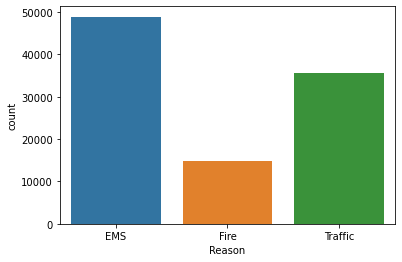

In [24]:
sns.countplot(x = 'Reason',data = df)

___
**let's begin to focus on time information. What is the data type of the objects in the timeStamp column?**

In [35]:
type(df["timeStamp"].iloc[20])

str

**we have seen that these timestamps are still strings. We will convert it to datetime**

In [36]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

**Creating three new columns**

> Day of Week

In [39]:
df['Hour'] = df['timeStamp'].apply(lambda x: x.hour)
df['Month'] = df['timeStamp'].apply(lambda x: x.month)
df['Day of Week'] = df['timeStamp'].apply(lambda x: x.dayofweek)

In [40]:
df[['Hour','Month','Day of Week']]

,Hour,Month,Day of Week
0,17,12,3
1,17,12,3
2,17,12,3
3,17,12,3
4,17,12,3
...,...,...,...
99487,11,8,2
99488,11,8,2
99489,11,8,2
99490,11,8,2


here, we notice month and week are in number. We need to name them.

In [43]:
w = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
df['Day of Week'] = df['Day of Week'].apply(lambda x: w[x-1])

In [48]:
df[["Day of Week"]].value_counts()

Day of Week
Mon            15150
Tue            14879
Thu            14833
Sun            14680
Wed            14478
Fri            13336
Sat            12136
dtype: int64

> Month

In [49]:
m = ['January','February','March','April','May','June','July','August','September','October','November','December']
df['Month'] = df['Month'].apply(lambda x: m[x-1])

In [50]:
df[['Month','Hour','Day of Week']]

,Month,Hour,Day of Week
0,December,17,Wed
1,December,17,Wed
2,December,17,Wed
3,December,17,Wed
4,December,17,Wed
...,...,...,...
99487,August,11,Tue
99488,August,11,Tue
99489,August,11,Tue
99490,August,11,Tue


**using seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column.**

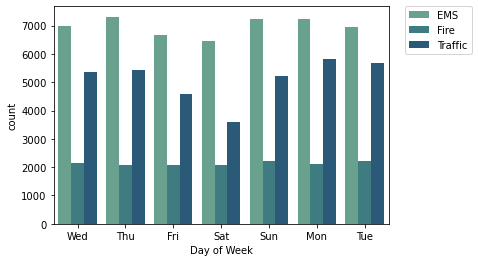

In [74]:
sns.countplot(x = "Day of Week", data = df,hue = 'Reason',palette="crest")

# Relocating the legend.
plt.legend(bbox_to_anchor=(1.05, 1),loc = 2,borderaxespad=0)

**Now do the same for Month:**

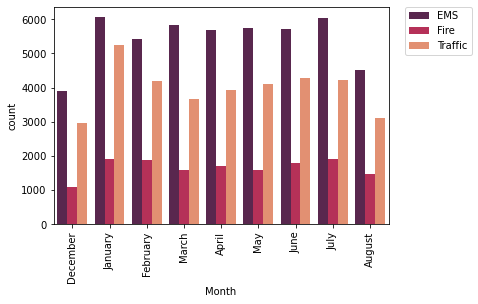

In [77]:
ax = sns.countplot(x = "Month", data = df, hue = "Reason",palette = 'rocket')

# Rotating month by 90 degree.
plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Rlocating Legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

Here, we noticed some of the months are missing.

In [79]:
byMonth = df.groupby("Month").count()
byMonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
April,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
August,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
December,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969
February,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
January,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
July,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
June,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
March,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
May,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


**Creating a new column date**

In [83]:
df["date"] = df["timeStamp"].apply(lambda x: x.date())

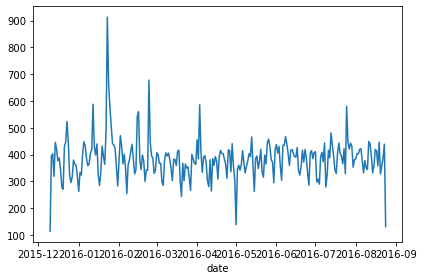

In [91]:
df.groupby('date').count()['twp'].plot()
plt.tight_layout()